In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,275.0,235.0,16.730,10.330,3877.0,3142.0,1119.00,5.0,4.0,4.0,...,3.0,0.171,6.00,17.28,5.178486,35.052122,10.5,7.0,0.0,1.0
1,235.0,235.0,229.300,182.600,12437.0,11253.0,117.70,3.0,6.0,4.0,...,4.0,0.150,6.33,18.96,4.539964,89.310331,12.0,8.0,0.0,1.0
2,275.0,235.0,276.900,0.000,13347.0,0.0,117.70,6.0,3.0,4.0,...,1.0,0.171,6.00,17.28,1.412026,31.485753,15.0,10.0,0.0,1.0
3,235.0,235.0,10.330,6.062,3142.0,2534.0,920.80,6.0,6.0,3.0,...,1.0,0.283,7.28,19.74,2.490511,27.250323,4.0,10.0,0.0,1.0
4,355.0,355.0,330.900,0.000,14276.0,0.0,920.80,3.0,2.0,4.0,...,4.0,0.171,6.00,17.28,0.313426,5.109617,8.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,275.0,275.0,6.062,3.492,2534.0,2124.0,19.43,3.0,4.0,3.0,...,4.0,0.283,7.28,19.74,2.423874,39.012098,2.0,4.0,0.0,1.0
2918,275.0,275.0,182.600,0.000,11253.0,0.0,671.20,4.0,3.0,4.0,...,3.0,0.300,6.60,10.27,1.658722,36.361108,24.0,20.0,1.0,0.0
2919,235.0,235.0,1119.000,0.000,21176.0,0.0,337.40,4.0,1.0,4.0,...,3.0,0.300,6.60,10.27,0.278154,15.864853,6.0,4.5,1.0,0.0
2920,355.0,275.0,1119.000,0.000,21176.0,0.0,13.17,3.0,2.0,3.0,...,4.0,0.200,6.77,23.99,0.399766,10.925555,3.5,14.0,0.0,1.0


In [4]:
train.describe()

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,...,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,287.539357,262.008898,849.835175,467.743080,14682.852498,7316.087269,349.925204,3.483915,3.503765,3.490760,...,2.017796,0.188300,6.414538,20.627885,1.416228,21.920161,9.654346,8.366530,0.454141,0.545859
std,49.531036,37.801884,1341.443158,1104.060283,8967.826291,9866.534651,436.671341,1.720822,1.731997,0.408004,...,1.418211,0.082292,0.385426,7.743924,1.283466,22.225221,5.884076,4.842449,0.497978,0.497978
min,235.000000,235.000000,3.492000,0.000000,2124.000000,0.000000,1.710000,1.000000,1.000000,3.000000,...,0.000000,0.100000,5.900000,10.270000,0.056110,0.132411,1.500000,1.500000,0.000000,0.000000
25%,235.000000,235.000000,54.100000,0.000000,6434.000000,0.000000,38.920000,2.000000,2.000000,3.000000,...,1.000000,0.123000,6.100000,13.910000,0.478853,7.339454,4.500000,4.000000,0.000000,0.000000
50%,275.000000,235.000000,276.900000,3.492000,13347.000000,2124.000000,117.700000,3.000000,4.000000,3.500000,...,2.000000,0.150000,6.330000,18.960000,0.997742,15.378362,8.000000,7.500000,0.000000,1.000000
75%,355.000000,275.000000,1119.000000,276.900000,21176.000000,13347.000000,623.900000,5.000000,5.000000,4.000000,...,3.000000,0.283000,6.690000,25.500000,1.935972,29.595909,14.000000,12.000000,1.000000,1.000000
max,355.000000,355.000000,6447.000000,5538.000000,40005.000000,34685.000000,1752.000000,6.000000,6.000000,4.000000,...,4.000000,0.354000,7.280000,35.660000,8.684904,275.706598,24.000000,20.000000,1.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Column fy Mpa           2922 non-null   float64
 1   Beam fy Mpa             2922 non-null   float64
 2   Columns 1-3 I mm4*10^6  2922 non-null   float64
 3   Columns 4-6 I mm4*10^6  2922 non-null   float64
 4   Columns 1-3 A mm2       2922 non-null   float64
 5   Columns 4-6 A mm2       2922 non-null   float64
 6   Beam I mm4*10^6         2922 non-null   float64
 7   Spans                   2922 non-null   float64
 8   Number of floors        2922 non-null   float64
 9   Floor height m          2922 non-null   float64
 10  Span width m            2922 non-null   float64
 11  LLRS tributary width m  2922 non-null   float64
 12  Floor mass kg           2922 non-null   float64
 13  Facade Load kN/m        2922 non-null   float64
 14  PGA g                   2922 non-null   

In [6]:
train.isna().sum()

Column fy Mpa             0
Beam fy Mpa               0
Columns 1-3 I mm4*10^6    0
Columns 4-6 I mm4*10^6    0
Columns 1-3 A mm2         0
Columns 4-6 A mm2         0
Beam I mm4*10^6           0
Spans                     0
Number of floors          0
Floor height m            0
Span width m              0
LLRS tributary width m    0
Floor mass kg             0
Facade Load kN/m          0
PGA g                     0
Magnitude                 0
Distance to fault km      0
Period s                  0
Max drift mm              0
Final Dead Load           0
Final Live Load           0
soil_class__B             0
soil_class__C             0
dtype: int64

In [7]:
test

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,355.0,355.0,5538.00,4221.000,34685.0,32053.0,231.30,4.0,4.0,3.0,...,17579.6280,4.0,0.354,6.50,15.82,0.216653,7.5,5.0,1.0,0.0
1,355.0,235.0,1119.00,0.000,21176.0,0.0,482.00,5.0,1.0,4.0,...,15968.5020,0.0,0.140,5.90,25.50,0.076358,9.0,6.0,0.0,1.0
2,235.0,235.0,10.33,6.062,3142.0,2534.0,1752.00,1.0,6.0,3.0,...,10531.4616,2.0,0.283,7.28,19.74,2.384245,8.0,12.0,0.0,1.0
3,355.0,235.0,637.20,0.000,17803.0,0.0,231.30,2.0,1.0,3.0,...,165958.2144,4.0,0.300,6.60,10.27,0.337537,21.0,7.0,1.0,0.0
4,275.0,235.0,1119.00,0.000,21176.0,0.0,13.17,1.0,2.0,3.0,...,4496.8770,0.0,0.150,6.20,13.91,0.180089,1.5,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,275.0,235.0,104.50,77.630,8682.0,7684.0,13.17,5.0,5.0,4.0,...,28347.6600,4.0,0.150,6.33,18.96,2.142105,7.5,7.5,0.0,1.0
321,355.0,275.0,10.33,6.062,3142.0,2534.0,337.40,1.0,5.0,3.0,...,24962.2560,2.0,0.140,5.90,25.50,2.938106,4.0,16.0,0.0,1.0
322,355.0,235.0,1119.00,0.000,21176.0,0.0,162.70,1.0,3.0,4.0,...,23983.3440,0.0,0.150,6.20,13.91,0.778842,15.0,7.5,1.0,0.0
323,275.0,275.0,637.20,0.000,17803.0,0.0,162.70,2.0,1.0,3.0,...,32654.8728,4.0,0.150,6.20,13.91,0.156314,15.0,9.0,1.0,0.0


In [8]:
test.isna().sum()

Column fy Mpa             0
Beam fy Mpa               0
Columns 1-3 I mm4*10^6    0
Columns 4-6 I mm4*10^6    0
Columns 1-3 A mm2         0
Columns 4-6 A mm2         0
Beam I mm4*10^6           0
Spans                     0
Number of floors          0
Floor height m            0
Span width m              0
LLRS tributary width m    0
Floor mass kg             0
Facade Load kN/m          0
PGA g                     0
Magnitude                 0
Distance to fault km      0
Period s                  0
Final Dead Load           0
Final Live Load           0
soil_class__B             0
soil_class__C             0
dtype: int64

In [9]:
submission

,Index,Max drift mm
0,0,18.60
1,1,-1.92
2,2,41.58
3,3,25.69
4,4,-5.01
...,...,...
320,320,24.14
321,321,30.55
322,322,3.18
323,323,3.84


In [10]:
train['Max drift mm'] = round(train['Max drift mm'],2)

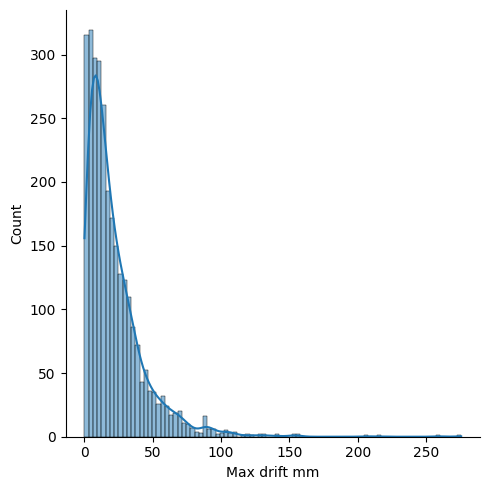

In [11]:
sns.displot(train['Max drift mm'], kde=True)

In [12]:
train["Max drift mm"].value_counts()

13.48    5
9.23     5
0.65     5
1.80     5
15.37    5
        ..
23.55    1
7.28     1
16.54    1
5.36     1
10.93    1
Name: Max drift mm, Length: 2169, dtype: int64

In [13]:
is_multi = train["Max drift mm"].value_counts() > 1
filtered = train[train["Max drift mm"].isin(is_multi[is_multi].index)]
train = filtered
train

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
8,275.0,235.0,869.700,0.0,19754.0,0.0,920.800,5.0,3.0,3.5,...,3.0,0.283,7.28,19.74,0.232733,6.24,2.0,2.0,0.0,1.0
9,235.0,235.0,3034.000,2153.0,28583.0,26048.0,1119.000,1.0,6.0,3.5,...,4.0,0.100,6.10,32.84,0.854743,9.87,16.0,16.0,1.0,0.0
13,355.0,235.0,3.492,0.0,2124.0,0.0,920.800,6.0,2.0,4.0,...,4.0,0.140,5.90,25.50,4.789651,12.07,12.0,8.0,0.0,1.0
19,235.0,235.0,6447.000,5538.0,40005.0,34685.0,482.000,3.0,6.0,3.5,...,4.0,0.123,6.19,12.90,1.803414,9.22,24.0,16.0,0.0,1.0
20,235.0,235.0,1119.000,0.0,21176.0,0.0,19.430,1.0,2.0,3.0,...,3.0,0.150,6.20,13.91,0.355339,8.07,6.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,355.0,235.0,1752.000,1412.0,24164.0,22646.0,5.412,1.0,5.0,3.5,...,0.0,0.150,6.33,18.96,1.024828,19.94,2.0,6.0,0.0,1.0
2916,355.0,355.0,869.700,637.2,19754.0,17803.0,162.700,5.0,6.0,4.0,...,4.0,0.100,6.69,35.66,2.095025,11.66,8.0,6.0,1.0,0.0
2918,275.0,275.0,182.600,0.0,11253.0,0.0,671.200,4.0,3.0,4.0,...,3.0,0.300,6.60,10.27,1.658722,36.36,24.0,20.0,1.0,0.0
2919,235.0,235.0,1119.000,0.0,21176.0,0.0,337.400,4.0,1.0,4.0,...,3.0,0.300,6.60,10.27,0.278154,15.86,6.0,4.5,1.0,0.0


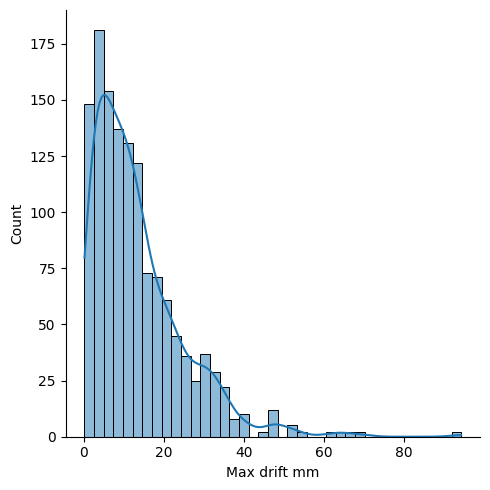

In [14]:
sns.displot(train['Max drift mm'], kde=True)

<Axes: xlabel='Number of floors', ylabel='Max drift mm'>

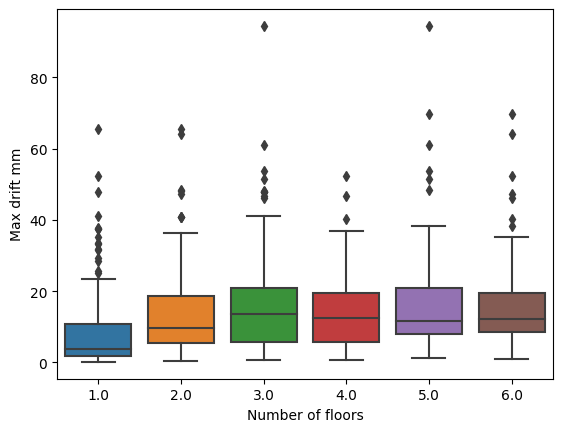

In [15]:
sns.boxplot(data=train, x="Number of floors", y="Max drift mm")

<Axes: xlabel='Floor height m', ylabel='Max drift mm'>

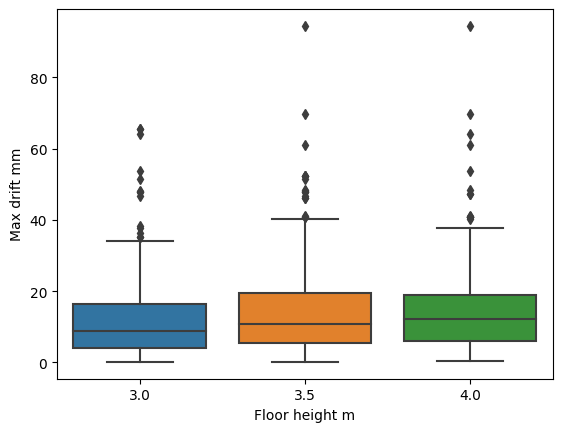

In [16]:
sns.boxplot(data=train, x="Floor height m", y="Max drift mm")

<Axes: xlabel='Distance to fault km', ylabel='Max drift mm'>

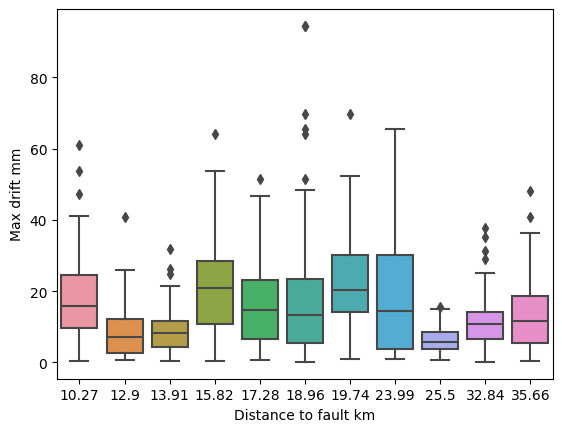

In [17]:
sns.boxplot(data=train, x="Distance to fault km", y="Max drift mm")

<Axes: >

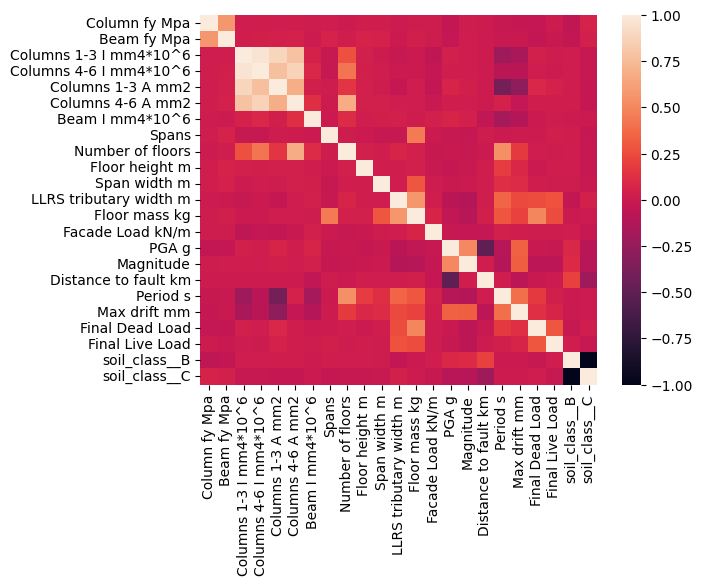

In [18]:
corr = train.corr()
sns.heatmap(corr)

In [19]:
corr

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
Column fy Mpa,1.000000,0.571658,0.021661,0.025671,0.022110,0.030635,0.013311,0.021099,0.001497,0.026901,...,0.013778,-0.040589,0.010573,0.006765,-0.022069,-0.030178,-0.035366,0.006117,-0.057098,0.057098
Beam fy Mpa,0.571658,1.000000,0.031172,0.032174,0.039625,0.051518,0.005110,0.060640,0.028479,0.057864,...,0.013418,-0.038016,0.023013,0.007811,-0.008910,-0.013691,-0.039838,-0.011914,-0.040592,0.040592
Columns 1-3 I mm4*10^6,0.021661,0.031172,1.000000,0.958702,0.884552,0.782775,0.051269,-0.016406,0.272546,0.039063,...,-0.055356,0.039109,0.025152,0.000883,-0.207875,-0.162614,0.041510,0.014837,0.017191,-0.017191
Columns 4-6 I mm4*10^6,0.025671,0.032174,0.958702,1.000000,0.767731,0.873985,0.080997,-0.022422,0.416254,0.032697,...,-0.038703,0.024487,0.019351,0.003474,-0.078206,-0.081993,0.019722,0.000955,0.018746,-0.018746
Columns 1-3 A mm2,0.022110,0.039625,0.884552,0.767731,1.000000,0.681653,0.038319,0.010465,0.149359,0.040858,...,-0.041858,0.064460,0.036494,0.002078,-0.406029,-0.287055,0.081575,0.054410,0.024536,-0.024536
Columns 4-6 A mm2,0.030635,0.051518,0.782775,0.873985,0.681653,1.000000,0.120884,0.003341,0.672103,0.039579,...,-0.015414,0.023486,0.017499,0.003143,0.049410,-0.035688,0.029919,0.029729,0.026524,-0.026524
Beam I mm4*10^6,0.013311,0.005110,0.051269,0.080997,0.038319,0.120884,1.000000,-0.006005,0.108179,0.030907,...,0.039856,0.064962,0.044611,-0.047244,-0.172509,-0.105190,-0.004983,0.012838,0.001032,-0.001032
Spans,0.021099,0.060640,-0.016406,-0.022422,0.010465,0.003341,-0.006005,1.000000,0.010211,-0.004162,...,-0.006386,-0.015710,-0.027808,0.013621,-0.007695,0.004215,0.005884,0.037635,0.028390,-0.028390
Number of floors,0.001497,0.028479,0.272546,0.416254,0.149359,0.672103,0.108179,0.010211,1.000000,0.045663,...,-0.020790,-0.012244,-0.016947,-0.000114,0.533032,0.175849,0.019795,0.011086,0.017669,-0.017669
Floor height m,0.026901,0.057864,0.039063,0.032697,0.040858,0.039579,0.030907,-0.004162,0.045663,1.000000,...,-0.010570,-0.030336,-0.009547,0.028938,0.184804,0.089183,-0.000026,0.026998,0.020725,-0.020725


In [20]:
from sklearn.model_selection import train_test_split

train_pd, val_pd = train_test_split(train, test_size=0.1, random_state=42)
train_pd.shape, val_pd.shape, test.shape

((1188, 23), (133, 23), (325, 22))

In [21]:
pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.5 MB/s eta 0:00:00


In [22]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
print(tf.__version__)

2.12.0


In [23]:
# Name of the label column.
label = "Max drift mm"

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_pd, fix_feature_names=False, label=label,task=tfdf.keras.Task.REGRESSION)
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_pd, fix_feature_names=False,label=label,task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, fix_feature_names=False,task=tfdf.keras.Task.REGRESSION)

In [24]:
# Configure the model.
argument = tfdf.keras.AdvancedArguments(fail_on_non_keras_compatible_feature_name = False)
model = tfdf.keras.GradientBoostedTreesModel(num_trees=1000,task = tfdf.keras.Task.REGRESSION, advanced_arguments=argument)
# Train the model.
model.fit(train_ds)

Use /tmp/tmprda1i8jd as temporary training directory
Reading training dataset...


Training dataset read in 0:00:04.658650. Found 1188 examples.
Training model...
Model trained in 0:00:01.826322
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [25]:
model.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (22):
	Beam I mm4*10^6
	Beam fy Mpa
	Column fy Mpa
	Columns 1-3 A mm2
	Columns 1-3 I mm4*10^6
	Columns 4-6 A mm2
	Columns 4-6 I mm4*10^6
	Distance to fault km
	Facade Load kN/m
	Final Dead Load
	Final Live Load
	Floor height m
	Floor mass kg
	LLRS tributary width m
	Magnitude
	Number of floors
	PGA g
	Period s
	Span width m
	Spans
	soil_class__B
	soil_class__C

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.               "Period s"  0.319562 ################
    2.              "Magnitude"  0.219278 ####
    3.          "Floor mass kg"  0.216347 ####
    4.       "Number of floors"  0.213485 ####
    5.

In [26]:
# Evaluate the model on the test dataset.
model.compile(metrics=["mse"])
evaluation = model.evaluate(val_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {np.sqrt(evaluation['mse'])}")

1/1 [==============================] - 1s 551ms/step - loss: 0.0000e+00 - mse: 18.8142
{'loss': 0.0, 'mse': 18.81418228149414}

MSE: 18.81418228149414
RMSE: 4.337531819075699


In [27]:
predictions = model.predict(test_ds)
predictions = np.round_(predictions, decimals = 2)
predictions = predictions.flatten()
predictions

1/1 [==============================] - 0s 216ms/step


array([ 4.7 ,  0.76, 31.3 , 16.95,  1.82, 38.57, 53.79, 11.01, 31.21,
       33.43,  1.81,  3.39, 27.22,  1.13,  8.01, 37.85, 34.27, 29.99,
       32.99, 33.34,  5.67, 33.05, 11.81, 34.76, 37.16,  4.96, 31.56,
       33.69, 26.9 ,  3.19, 42.08,  0.95, 15.  , 29.23, 36.4 , 11.34,
       13.76, 28.86, 33.17, 21.34, 13.89, 19.59, 19.76, 46.18, 23.04,
       15.52, 10.25, 31.47, 15.69, 33.12, 12.62, 15.89, 32.47, 24.81,
       18.22,  1.37, 21.43,  7.33, 22.13, 21.74,  9.57, 37.06, 18.62,
       33.67, 30.38, 10.36,  9.69,  6.09,  7.63,  3.2 ,  6.3 , 30.84,
       43.59, 40.4 , 11.93, 10.45, 32.16, 54.45,  2.13,  9.76,  5.6 ,
        8.96, 19.63, 37.32, 10.64, 15.13,  9.27, 35.61, 42.56, 37.04,
       23.04, 20.06, 35.58, 17.06, 20.87,  6.49,  8.34, 20.03, 19.12,
       20.94, 14.57, 41.03, 39.8 ,  4.99,  8.82, 38.03, 25.09, 17.73,
       23.6 , 15.96,  2.95, 23.37,  3.31,  4.02, 12.8 , 81.06,  4.9 ,
       47.83,  3.34,  2.25, 13.44,  1.62,  2.03, 39.14, 18.05, 30.21,
       41.31, 14.82,

In [28]:
submission['Max drift mm'] = predictions
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission

,Index,Max drift mm
0,0,4.70
1,1,0.76
2,2,31.30
3,3,16.95
4,4,1.82
...,...,...
320,320,38.31
321,321,11.17
322,322,8.16
323,323,1.77
